In [ ]:
# Thanks to Ayse Bat and others for large contributions of their Kernels.


## Please feel free to see if you can improve my score beyond 0.788

In [2]:
#visualization imports

import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns


In [1]:
#Data analysis

import numpy as np
import pandas as pd
#Register Pandas Formatters and Converters with matplotlib
pd.plotting.register_matplotlib_converters()
pd.set_option('use_inf_as_na', True) #turns all inf,-inf into Nan values

In [3]:
#machine learning imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier

import xgboost as xg

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import cross_val_predict

#import pandas_profiling as pp

In [4]:
import warnings
#warnings.filterwarnings('ignore') #changed ignore to default
#warnings.simplefilter('ignore')

In [5]:
def missing_values(data_set):
    missings = data_set.isna().sum().sort_values(ascending=False)
    percent = round(data_set.isna().sum().sort_values(ascending=False)/len(data_set)*100,2)
    return pd.concat([missings,percent], axis=1, keys=['Missing','Percentage'])

In [6]:
def missing_precent(data_column):
    percent=str((data_column.isnull().sum()/len(train))*100)+str("%")    
    return percent

In [7]:
def DT_Classifier(X,y):
    clf = DecisionTreeClassifier()
    mod =clf.fit(X, y)
    return mod

In [8]:
def LR_Classifier(X, y):
    clf = LogisticRegression()
    mod =clf.fit(X,y)   
    return mod

In [9]:
def RTF_Classifier(X,y):
    clf = RandomForestClassifier()
    mod = clf.fit(X,y)
    return mod
    

In [10]:
def Knn_Classifier(X, y, n_neighbors):
    clf = KNeighborsClassifier(n_neighbors)
    mod = clf.fit(X,y)
    return mod

In [11]:
def GNB_Classifier(X,y):
    clf = GaussianNB()
    mod = clf.fit(X,y)
    return mod

In [12]:
def SVM_Classifier(X,y):
    clf = svm.SVC(kernel='rbf', C=0.1, gamma=0.1)
    mod = clf.fit(X,y)
    return mod

In [13]:
def  AB_Classifier(X,y):
    clf = AdaBoostClassifier(n_estimators=900, random_state=0, learning_rate=0.01)
    mod.fit(X,y)
    return mod


In [14]:
def XGBoost_Classifier(X,y):
    #clf = xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
    clf = xg.XGBClassifier()

    mod.fit(X,y)
    return mod

In [15]:
def Bagging_Classifier(X,y):
    from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
    from sklearn.ensemble import BaggingClassifier
    from sklearn.model_selection import GridSearchCV, StratifiedKFold
    
    n_estimators = [10,30,50,70,80,150,160, 170,175,180,185];
    cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)

    parameters = {'n_estimators':n_estimators,        
        }
    grid = GridSearchCV(BaggingClassifier(base_estimator= None, ## If None, then the base estimator is a decision tree.
                                      bootstrap_features=False),
                                 param_grid=parameters,
                                 cv=cv,
                                 n_jobs = -1)
    mod=grid.fit(X,y) 
    print ("best grid",grid.best_score_)
    print ("best params",grid.best_params_)
    print ("best_estimator",grid.best_estimator_)
    bagging_grid = grid.best_estimator_
    print('bagging grid score',bagging_grid.score(X,y))
    return mod

In [16]:

# Load the Datasets

import os

dir_name = "/Users/k/courses/kaggle/titanic/data"

#for dirname, _, filenames in os.walk(dir_name):
 #   for filename in filenames:    
  #      print(os.path.join(dirname, filename))

titanic_train = os.path.join(dir_name,'train.csv')
titanic_test  = os.path.join(dir_name,'test.csv')
titanic_gs    = os.path.join(dir_name,'gender_submission.csv')

train = pd.read_csv(titanic_train)
test  = pd.read_csv(titanic_test)
gs    = pd.read_csv(titanic_gs)

all_data =[train,test]


In [17]:
# Data shapes

print("\ntrain shape:",train.shape," test shape",test.shape,"\n")



train shape: (891, 12)  test shape (418, 11) 



In [18]:
#check for Null values


print("Missing values for train:")
missing_values(train)

#print ("\n missing values for X_train", train.isnull().sum())
#print ("missing values for X_test", test.isnull().sum())


Missing values for train:


,Missing,Percentage
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
Fare,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


In [19]:
print("Missing values for test:")
test.isna().sum().sort_values(ascending=False)

Missing values for test:


Cabin          327
Age             86
Fare             1
Embarked         0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
PassengerId      0
dtype: int64

In [20]:
# to tell you which feature fare is missing
test[test.Fare.isnull()] 

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [21]:
print ('missing data percent for age column:',missing_precent(train.Age))

missing data percent for age column: 19.865319865319865%


In [22]:
#Grouping based on Embarked location, sex and Pclass
print(train.groupby(['Embarked','Sex'])['Pclass'].count())

Embarked  Sex   
C         female     73
          male       95
Q         female     36
          male       41
S         female    203
          male      441
Name: Pclass, dtype: int64


In [23]:
#Embarked in train has 2 null values fill it with 'S' since most embarked as 'S'
train['Embarked']=train['Embarked'].fillna('S')


# Filling the missing value in Fare with the median Fare of 3rd class alone passenger
med_fare = test.groupby(['Pclass','SibSp','Parch'])['Fare'].median()[3][0][0]
test['Fare'] = test['Fare'].fillna(med_fare)


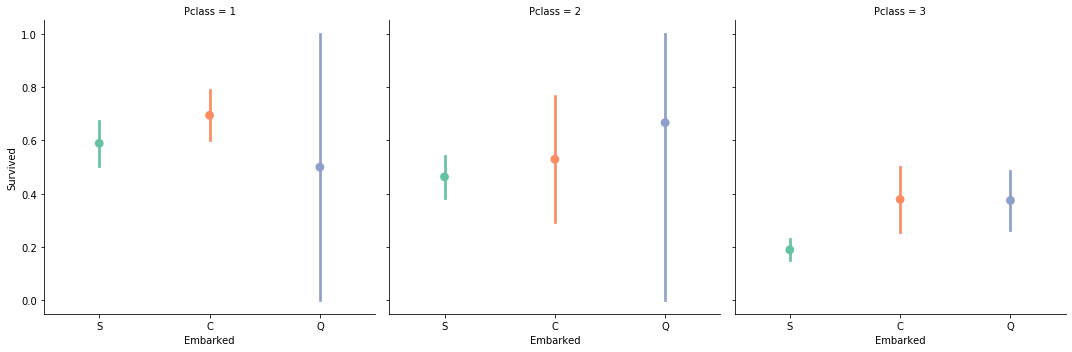

In [24]:
#Surviver based on Embarked and Pclass
sns.catplot('Embarked', 'Survived', col='Pclass',data=(train), palette='Set2',kind='point')

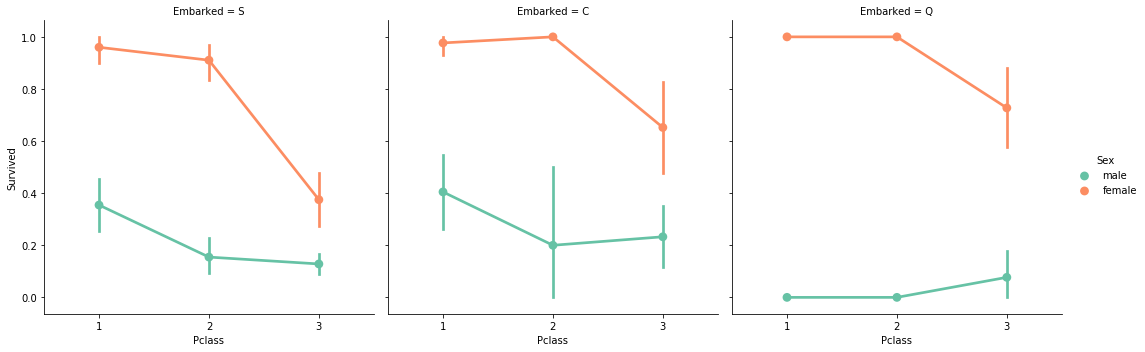

In [25]:
sns.catplot('Pclass','Survived',hue='Sex',col='Embarked',data=train, palette='Set2',kind='point')
plt.show()

* ** Sibling = *brother, sister, stepbrother, stepsister* **

* ** Spouse =* husband, wife * **

* The barplot and factor shows
    * If the passnger dosen't have any SibSp on boat, Thay have 34% change to survive
    * Higher change to survive with 1 or 2 SibSp 
    * There is no change to survive with 5 0r 8 SibSp, It could be also reason these people from Pclass 3

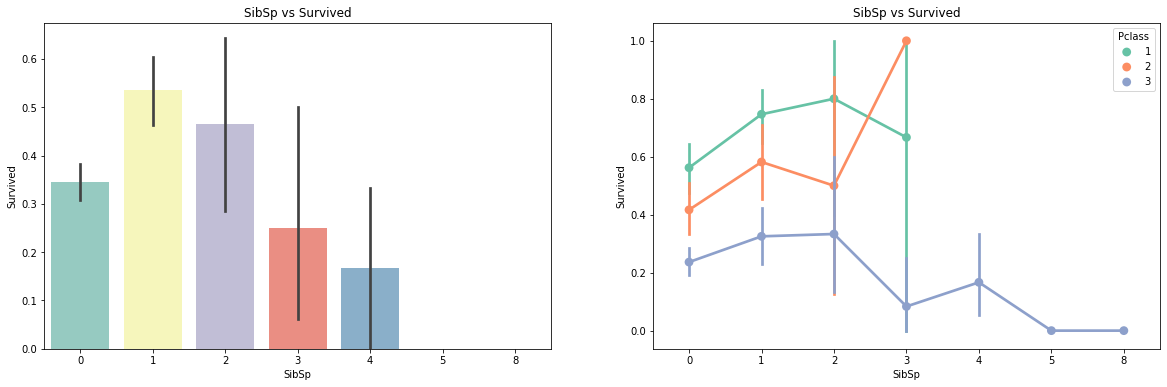

In [26]:
f, ax = plt.subplots(1,2, figsize=(20,6))
sns.barplot('SibSp','Survived', data=(train), ax=ax[0], palette='Set3')
ax[0].set_title('SibSp vs Survived')
sns.catplot('SibSp','Survived',data=(train), ax=ax[1],hue='Pclass', palette='Set2',kind='point')
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

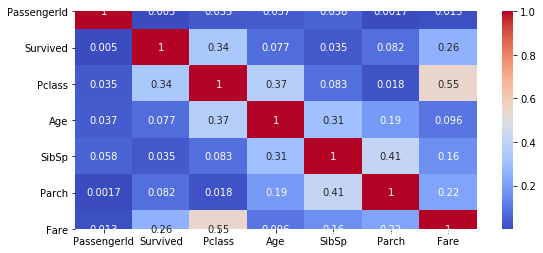

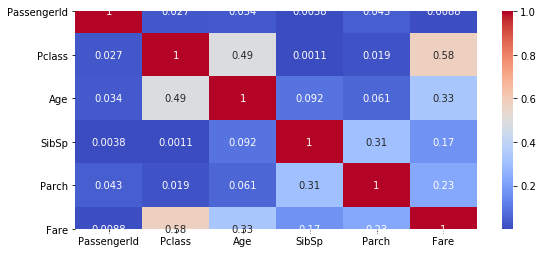

In [27]:
# Fill in the age values with a column that has a correlation with age
full_set=[train,test]

for df in full_set:
    data_corr = df.corr().abs()
    plt.figure(figsize=(9,4))
    sns.heatmap(data_corr, annot=True,cmap='coolwarm')
    plt.show()

In [28]:
#extract titles

for df in full_set:
    df['Initial']=0

    for i in df:
        df['Initial']=df.Name.str.extract('([A-Za-z]+)\.') 


In [29]:
#show the frequency of the titles for male and female
pd.crosstab(train.Initial,train.Sex).T.style.background_gradient(cmap="YlGnBu")

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [30]:
#Survived
pd.crosstab(train.Sex,train.Survived,margins=True).style.background_gradient(cmap='Set3')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [31]:
#Survived per class ticket
pd.crosstab(train.Pclass,train.Survived,margins=True).style.background_gradient(cmap='Set3')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [32]:
# Survival based on gender and cabin class
pd.crosstab(train.Pclass,train.Survived,margins=True).style.background_gradient(cmap='Set3')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [33]:

X_train = train
X_test  = test

y_train = X_train.Survived


#train.describe
#display(X_train.info())
#display(X_test.info())

#print (train.columns)
#print ("test columns: ",test.columns)

print(X_train.shape,X_test.shape)





(891, 13) (418, 12)


In [34]:
#Survival based on Embarked, Pclass and sex
pd.crosstab([train.Embarked, train.Pclass],[train.Sex, train.Survived], margins=True).style.background_gradient(cmap='Set3')

In [35]:
print("Youngest:", train['Age'].min())
print("Oldest:", train['Age'].max())

Youngest: 0.42
Oldest: 80.0


In [36]:
#replace the values according the above cross tab
for df in [X_train,X_test]:
    df['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],
                          ['Miss','Miss','Miss','Dr','Mr','Mrs','Mrs','Mr','Mr','Mr','Mr','Mr','Mr','Miss'],inplace=True)


In [37]:
for df in [X_train, X_test]:
#fill the age values based on median value for Pclass and sex
    df['Age'] = df.groupby(['Sex','Pclass','Initial'])['Age'].apply(lambda x:x.fillna(x.median()))

In [38]:
# Survival rate based on the Fare
train['Fare_Range']=pd.qcut(train['Fare'],4)
train.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [39]:
#Fare in X_test has a null value so fill it with medianFare of 3rd class alone passenger

med_fare = X_test.groupby(['Pclass','SibSp','Parch'])['Fare'].median()[3][0][0]
X_test['Fare'] = X_test['Fare'].fillna(med_fare)

In [40]:

for df in [X_train, X_test]:
    df['Fare_Range'] = 0
    df.loc[df['Fare']<=7.91,'Fare_Range'] = 0
    df.loc[(df['Fare']>7.91) & (df['Fare']<=14.454), 'Fare_Range'] = 1
    df.loc[(df['Fare']>14.454) & (df['Fare']<=31.0), 'Fare_Range'] = 2
    df.loc[(df['Fare']>31.0) & (df['Fare']<=513), 'Fare_Range'] = 3

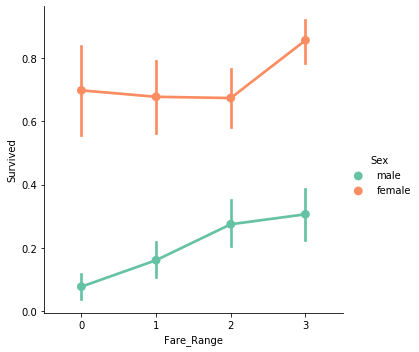

In [41]:
sns.catplot('Fare_Range','Survived',data=X_train,hue='Sex',palette='Set2',kind='point')
plt.show()

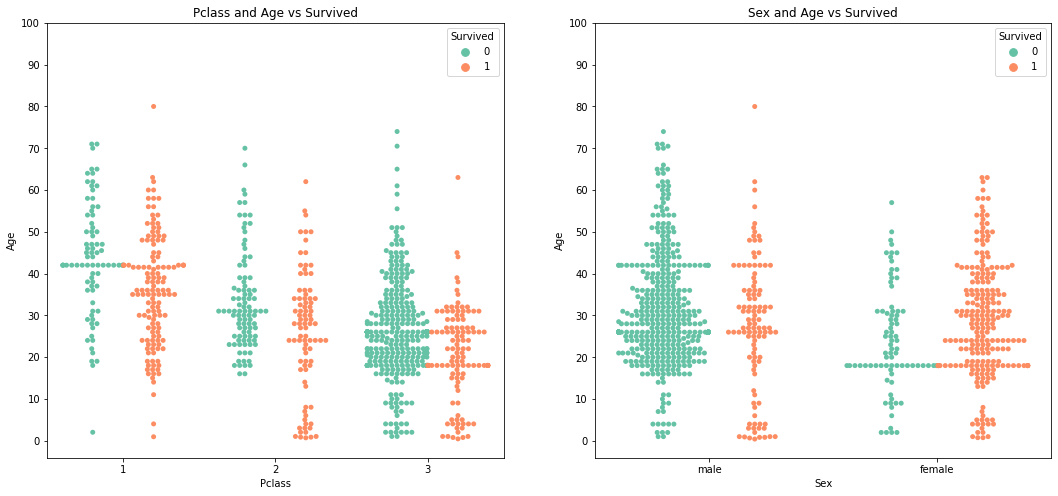

In [42]:

f,ax=plt.subplots(1,2,figsize=(18,8))
sns.swarmplot("Pclass","Age", hue="Survived", data=X_train,dodge=True,ax=ax[0],palette='Set2')
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.swarmplot("Sex","Age", hue="Survived", data=X_train,dodge=True,ax=ax[1],palette='Set2')
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

In [43]:
#columns that have to be converted from string to int
gender =  {'male': 0,'female': 1} 
embarked = {'S':0, 'C':1,'Q':2}
initial = {'Mr':0, 'Mrs':1, 'Miss':2, 'Master':3, 'Dr':4}
for df in [X_train,X_test]:
    
    df['Sex'] = [gender[item] for item in df.Sex]
    df['Embarked'] = [embarked[item] for item in df.Embarked]
    df['Initial'] = [initial[item] for item in df.Initial]

In [44]:
#Age is a continuous variable and within machine learning we need
# to convert it into categorical values
#bin labels must be one fewer than bin edges

#age_bins = [-1,0, 3, 14, 18, 30, 80]
age_edges = [-1,0, 5,18, 30, 80]
age_labels = ['Infant', 'Childern', 'Teenagers', 'Adult', 'Old']
X_train['AgeGroup'] = pd.cut(X_train['Age'], age_edges, labels=age_labels)
X_test['AgeGroup'] = pd.cut(X_test['Age'], age_edges, labels=age_labels)


In [45]:
age_mapping = {'Infant': 1, 'Childern': 2, 'Teenagers': 3, 'Adult': 4, 'Old': 5}
X_train['AgeGroup'] = X_train['AgeGroup'].map(age_mapping)
X_test['AgeGroup'] = X_test['AgeGroup'].map(age_mapping)
X_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Fare_Range,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,0,4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,1,3,5
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,2,1,4
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,1,3,5
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,0,1,5


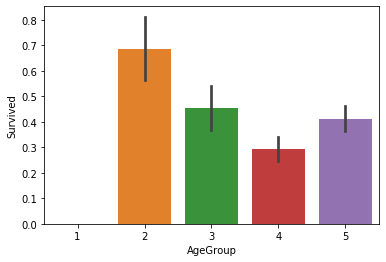

In [46]:

# Survival based on age, best children then teenagers
X_train['Age'] = X_train['Age'].round().astype(int)

sns.barplot(x='AgeGroup', y='Survived', data=(X_train))
plt.xlabel = ('AgeGroup')
plt.ylabel = ('Survived')
plt.show()


Column mapping and column droppings:

Name--> Cannot be converted into any categorical value.

Age--> AgeGroup.

Ticket--> Random string that cannot be categorised.

Fare--> Fare_Range.

Cabin--> A lot of NaN values and also many passengers have multiple cabins. So this is a useless feature.

PassengerId--> Cannot be categorised.

In [47]:
print(X_train.shape,X_test.shape)

(891, 15) (418, 14)


In [48]:

X_train = X_train.drop(['PassengerId','Survived','Age','Ticket','Cabin','Name','Fare'], axis = 1 )

#need passengerID for submission so copy test first
X_test_copy=X_test.copy()

X_test = X_test.drop(['PassengerId','Age','Ticket','Cabin','Name','Fare'], axis = 1 )


In [49]:
#X_train.info()
X_train.shape
X_train.columns

Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Initial', 'Fare_Range',
       'AgeGroup'],
      dtype='object')

In [50]:
#X_test.info()
X_test.shape
X_test.columns


Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Initial', 'Fare_Range',
       'AgeGroup'],
      dtype='object')

In [51]:
from sklearn.model_selection import train_test_split #training and testing data split
y =y_train
X = X_train
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.3, random_state=0)

In [52]:

#X_train.head()
print("X_train, y_train:",X_train.shape,y_train.shape)
print("X_valid, y_valid:",X_valid.shape,y_valid.shape)
print("X_test:",X_test.shape)

X_train, y_train: (623, 8) (623,)
X_valid, y_valid: (268, 8) (268,)
X_test: (418, 8)


In [53]:
#from sklearn import metrics #accuracy measure


In [54]:
#Decision Tree
mod = DT_Classifier(X_train, y_train)
#y_pred = mod.predict(X_test)
#DTscore = mod.score(X_test, y_pred)*100

y_pred = mod.predict(X_valid)
DTscore=metrics.accuracy_score(y_valid, y_pred)

print("DTscore:",DTscore)

DTscore: 0.8022388059701493


In [55]:
#Logistic Regression
mod = LR_Classifier(X_train, y_train)
y_pred = mod.predict(X_valid)
LRscore=metrics.accuracy_score(y_valid, y_pred)

#LRscore = mod.score(X_test, y_pred)
print(LRscore)

0.8246268656716418


In [56]:
#Random tree forrest
mod = RTF_Classifier(X_train, y_train)
y_pred = mod.predict(X_valid)
RTFscore=metrics.accuracy_score(y_valid, y_pred)

#RTFscore = mod.score(y_valid, y_pred)*100
print(RTFscore)


0.8208955223880597


In [57]:
#Gaussian
mod = GNB_Classifier(X_train, y_train)
y_pred = mod.predict(X_valid)

#GNBscore = mod.score(X_test, y_pred)*100
GNBscore = metrics.accuracy_score(y_valid, y_pred)
print(GNBscore)

0.8097014925373134


In [58]:
# K-nearest-neighbors
mod = Knn_Classifier(X_train,y_train,4)
y_pred = mod.predict(X_valid)

KNscore=metrics.accuracy_score(y_valid, y_pred)

print ('KNscore', KNscore)

KNscore 0.8022388059701493


In [59]:
#support vector machine
mod = SVM_Classifier(X_train, y_train) #kernel='rbf'

y_pred = mod.predict(X_valid)
SVMscore = metrics.accuracy_score(y_valid, y_pred)

print('SVMscore', SVMscore)


SVMscore 0.8208955223880597


In [60]:
#ABa booster
mod =AB_Classifier(X_train, y_train)
y_pred = mod.predict(X_valid)
ABscore = metrics.accuracy_score(y_valid, y_pred)
print('AB score', ABscore)

AB score 0.8208955223880597


In [61]:
#XG boost
mod = XGBoost_Classifier(X_train, y_train)
y_pred = mod.predict(X_valid)
XGBscore = metrics.accuracy_score(y_valid, y_pred)
print ('XGB score', XGBscore)


XGB score 0.8208955223880597


In [62]:
#Boosting
mod = Bagging_Classifier(X_train,y_train)
y_pred = mod.predict(X_valid)
score=metrics.accuracy_score(y_valid, y_pred)
print('-'*50)
print('score', score)

best grid 0.8117647058823529
best params {'n_estimators': 185}
best_estimator BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=185, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False)
bagging grid score 0.8956661316211878
--------------------------------------------------
score 0.8134328358208955


In [63]:
#sort the scores best on the best classifier first
model_score = pd.DataFrame({
    'Model':['Decision Tree', 'Logistic Regression', 'Random Forest',
            'GaussianNB','KNeigbors','Svm', 'XGBoost'],
    'Scores':[DTscore,LRscore,RTFscore,GNBscore,KNscore,SVMscore,XGBscore]})

print(model_score.sort_values(by='Scores', ascending=False))

                 Model    Scores
1  Logistic Regression  0.824627
2        Random Forest  0.820896
5                  Svm  0.820896
6              XGBoost  0.820896
3           GaussianNB  0.809701
0        Decision Tree  0.802239
4            KNeigbors  0.802239


In [64]:
#hyper parameters tunning
from sklearn.model_selection import GridSearchCV
C=[0.05, 0.1, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper = {'kernel':kernel, 'C':C, 'gamma':gamma}
gd =GridSearchCV(estimator=svm.SVC(), param_grid=hyper, verbose=True)

mod = gd.fit(X_train,y_train)
y_pred = mod.predict(X_valid)
score=metrics.accuracy_score(y_valid, y_pred)
print('score', score)

print("best score:",gd.best_score_)
print("best estimator:",gd.best_estimator_)

Fitting 3 folds for each of 260 candidates, totalling 780 fits
score 0.8171641791044776
best score: 0.8314606741573034
best estimator: SVC(C=0.4, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 780 out of 780 | elapsed:   11.5s finished


In [65]:
clf = svm.SVC(C=0.2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
mod = clf.fit(X_train,y_train)

y_pred = mod.predict(X_valid)
SVMscore = metrics.accuracy_score(y_valid, y_pred)

print('SVMscore', SVMscore)


SVMscore 0.8171641791044776


In [67]:
print(X_train.shape,X_test.shape)

(623, 8) (418, 8)


In [68]:
n_estimator =range(50, 1000, 50)
hyper = {'n_estimators': n_estimator}
gd = GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=hyper, verbose=True)
gd.fit(X_train,y_train)
print("best score",gd.best_score_)
print("best estimator:",gd.best_estimator_)

Fitting 3 folds for each of 19 candidates, totalling 57 fits
best score 0.8154093097913323
best estimator: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)


[Parallel(n_jobs=1)]: Done  57 out of  57 | elapsed:   60.0s finished


In [69]:
clf= RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=750, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)
mod = clf.fit(X_train,y_train)

y_pred = mod.predict(X_valid)
RFscore = metrics.accuracy_score(y_valid, y_pred)

print('RFscore', RFscore)

RFscore 0.8134328358208955


In [69]:
print(X_train.shape,X_test.shape)

(623, 8) (418, 8)


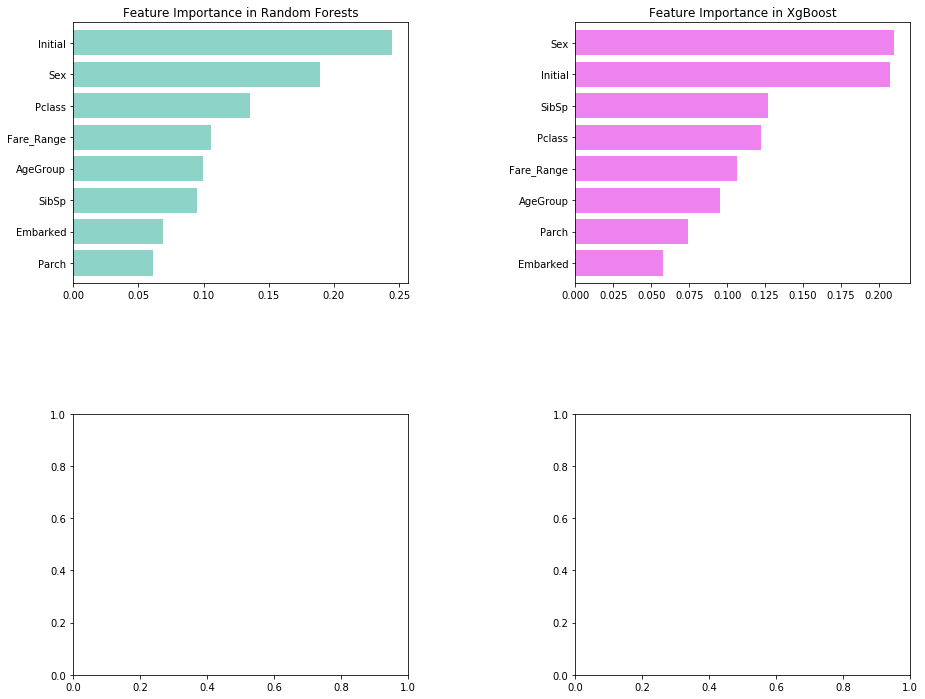

<Figure size 432x288 with 0 Axes>

In [70]:
#feature importance

f, ax = plt.subplots(2,2, figsize=(15,12))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X_train,y_train)
pd.Series(model.feature_importances_,X_train.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0], cmap='Set3')
ax[0,0].set_title('Feature Importance in Random Forests')

#model=svm.SVC(kernel='rbf', C=0.1, gamma=0.1)
#model.fit(X,y)
#pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0], cmap='Set3')
# ax[0,1].set_title('Feature Importance in SVM')

#model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model = RandomForestClassifier()
model.fit(X_train,y_train)
pd.Series(model.feature_importances_,X_train.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='violet')
ax[0,1].set_title('Feature Importance in XgBoost')
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

model = AdaBoostClassifier()
model.fit(X_train,y_train)
pd.Series(model.feature_importances_,X_train.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],color='violet')
ax[1,0].set_title('Feature Importance in AdABoost')
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

In [71]:
print(X_train.shape,X_test.shape)

(623, 8) (418, 8)


In [80]:
#Let's redefine the feture for random forest
# reducing the features to the most important ones for random forest
#['Initial','Sex','Pclass','AgeGroup','Fare_Range','SibSp','Embarked',Parch']
feature_random = ['Initial']

X_random = X[feature_random]
XR_train, XR_valid, yR_train, yR_valid = train_test_split(X_random,y, test_size=0.3, random_state=0)

model = RandomForestClassifier()
#model =AdaBoostClassifier(n_estimators=900, random_state=0, learning_rate=0.01)
model.fit(XR_train, yR_train)
predict_random = model.predict(XR_valid)
y_pred =  metrics.accuracy_score(predict_random, yR_valid)
print('The accuracy of the  Model is ',y_pred)

The accuracy of the  Model is  0.7947761194029851


In [71]:
print(X_train.shape,X_test.shape)

(623, 8) (418, 8)


In [72]:
#Let's redefine the feture for xgboost
# reducing the features to the most important ones for random forest
#['Initial','Sex','Pclass','AgeGroup','Fare_Range','SibSp','Embarked',Parch']

feature_random = ['Initial','Sex','Pclass','SibSp','AgeGroup','Parch']

X_random = X[feature_random]
XR_train, XR_valid, yR_train, yR_valid = train_test_split(X_random,y, test_size=0.3, random_state=0)

#model=xg.XGBClassifier()
model =AdaBoostClassifier(n_estimators=900, random_state=0, learning_rate=0.01)
model.fit(XR_train, yR_train)
predict_random = model.predict(XR_valid)
y_pred =  metrics.accuracy_score(predict_random, yR_valid)
print('The accuracy of the  Model is ',y_pred)

The accuracy of the  Model is  0.8171641791044776


Text(0.5, 1, 'Decision Tree')

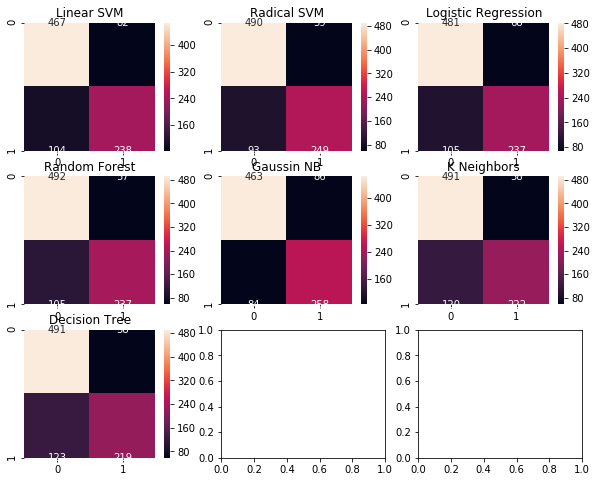

In [81]:
# confusion matrix

f,ax  = plt.subplots(3,3, figsize=(10,8))

y_pred = cross_val_predict(svm.SVC(kernel ='linear'),X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred), ax=ax[0,0], annot=True,fmt='2.0f')
ax[0,0].set_title('Linear SVM')

y_pred = cross_val_predict(svm.SVC(kernel ='rbf'),X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred), ax=ax[0,1], annot=True,fmt='2.0f')
ax[0,1].set_title('Radical SVM')

y_pred = cross_val_predict(LogisticRegression(solver='liblinear'),X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred), ax=ax[0,2], annot=True,fmt='2.0f')
ax[0,2].set_title('Logistic Regression')

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred), ax=ax[1,0], annot=True,fmt='2.0f')
ax[1,0].set_title('Random Forest')

y_pred = cross_val_predict(GaussianNB(),X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred), ax=ax[1,1], annot=True,fmt='2.0f')
ax[1,1].set_title('Gaussin NB')

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=4),X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred), ax=ax[1,2], annot=True,fmt='2.0f')
ax[1,2].set_title('K Neighbors')

y_pred = cross_val_predict(DecisionTreeClassifier(),X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred), ax=ax[2,0], annot=True,fmt='2.0f')
ax[2,0].set_title('Decision Tree')




Ensembling

Is a good way to increase the accuracy or performance of a model, It is the combination of various simple models to create powerful model.

Voting Classifier
Bagging
Boosting
.

In [82]:
#Voting Classifier

#It is the simplest way of combining predictions from many different machine larning models. 
#It gives prediction results based on the prediction of all the submodels

from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=9)),
                                        ('RBF', svm.SVC(kernel='rbf',probability=True,C=0.4,gamma=0.1)),
                                        ('RFor', RandomForestClassifier(n_estimators=900, random_state=0)),
                                        ('LR', LogisticRegression(C=0.05)),
                                        ('DT', DecisionTreeClassifier(random_state=0)),
                                        ('NB', GaussianNB()),
                                        ('Svm', svm.SVC(kernel='linear',probability=True))],
                           voting='soft').fit(X_train, y_train)

print('The accuracy for ensembled model is:',ensemble.score(X_valid,y_valid))


         

The accuracy for ensembled model is: 0.8134328358208955


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [77]:
#Bagging
#Unlike Voting Classifier, Bagging makes use of similar classifiers.
from sklearn.ensemble import BaggingClassifier
model_bag = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3), random_state=0, n_estimators=800)
model_bag.fit(X_train, y_train)
prediction_bag = model_bag.predict(X_valid)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction_bag,y_valid))

The accuracy for bagged KNN is: 0.8134328358208955


In [80]:
#y_pred=mod.predict(X_test)
#y_pred=model_bag.predict(X_test)

#final model:
model = LR_Classifier(X_train, y_train)

y_pred = model.predict(X_test)

#y_pred=model.predict(X_test[feature_random]) # feature reductions
print('final ypred, X_test',y_pred.shape, X_test.shape)

final ypred, X_test (418,) (418, 8)


In [ ]:

submission = pd.DataFrame({
        "PassengerId": X_test_copy["PassengerId"],
        "Survived": y_pred
    })
submission.to_csv('submission.csv', index=False)

In [ ]:
print('X_train',len(X_train))
print('y_pred', len(y_train))
print('X_test',len(X_test))

X_train.to_pickle('X_train')
y_train.to_pickle('y_train')
X_test.to_pickle('X-test')

test=pd.read_pickle('X_train')
test.head()


In [ ]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")